In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


[-0.18630063 -0.29795513 -2.17856711 ... -2.14450451 -0.49672496
 -1.24019966]


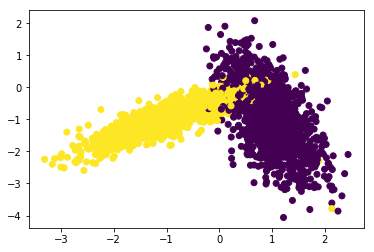

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
print(X_test[:,1])
plt.show()

# Implementing Custom RandomSearchCV

  0%|          | 0/10 [00:00<?, ?it/s]

[28, 39, 32, 24, 47, 18, 27, 2, 5, 36]


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


[0.9574666666666666, 0.9556, 0.9568, 0.9585333333333335, 0.9569333333333333, 0.9596, 0.9578666666666665, 0.9674666666666667, 0.9632000000000001, 0.9560000000000001]
[0.9560000000000001, 0.9557333333333333, 0.9556666666666667, 0.9561333333333334, 0.9561999999999999, 0.9555333333333333, 0.9560666666666666, 0.9400000000000001, 0.9513999999999999, 0.9559333333333333]


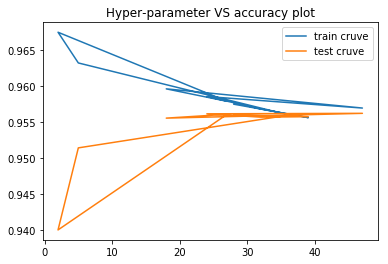

In [74]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
  
def randomly_select_params_in_range_from_1_to_len(params_range):
    return random.sample(range(1, params_range),10)

def RandomSearchCV(x_train,y_train,classifier, params_range, folds):
    group=[]
    grp=[]
    trainscores = []
    testscores  = [] 
    params_list=randomly_select_params_in_range_from_1_to_len(params_range)
    print(params_list)
    params = {'n_neighbors':params_list}
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = [] 
        for i in range(0, folds):
            value=(len(x_train)/(folds))#Finding length of the group
            boundary=int(value)#converting to int value
            train_indices=list(set(list(range((boundary*i), (boundary*(i+1))))))#selecting Indices for group(i) 
            test_indices = list(set(list(range(0, len(x_train)))) - set(train_indices))#selecting Indices otehr than that of group(i) for testing
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)          
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params
  
  #--------------------------------------------------------------------------------------------------------------------------
  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range=50
folds = 3
trainscores,testscores,params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
print(trainscores)
print(testscores)
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


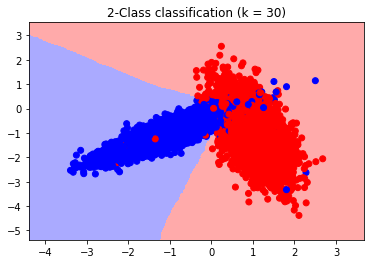

In [72]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors =30)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)